In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

In [19]:
d = load_breast_cancer()
x = d.data
y = d.target
d

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [20]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [22]:
df = pd.DataFrame(x, columns=d.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [23]:
scaler = StandardScaler()
std = scaler.fit_transform(x)
std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [24]:
# Agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
y_pred = agg_clustering.fit_predict(std)
ac=accuracy_score(y,y_pred)
print("Accuracy Score - Agglomerative Hierarchical Clustering:", ac*100)

Accuracy Score - Agglomerative Hierarchical Clustering: 88.04920913884007


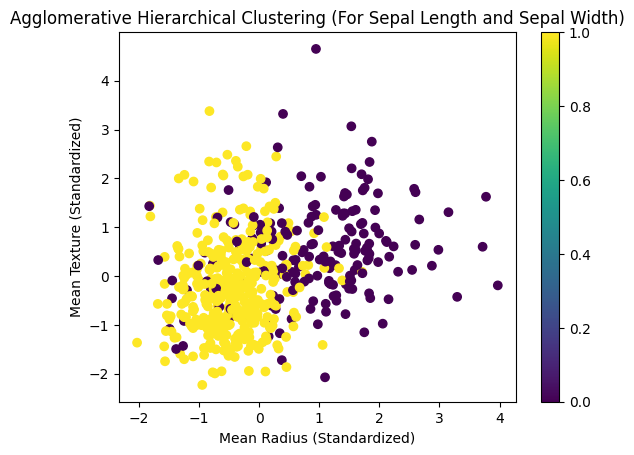

In [45]:
plt.scatter(std[:, 0], std[:, 1], c=y_pred)
plt.title('Agglomerative Hierarchical Clustering (For Sepal Length and Sepal Width)')
plt.xlabel('Mean Radius (Standardized)')
plt.ylabel('Mean Texture (Standardized)')
plt.colorbar()
plt.show()

plt.scatter(std[:, 2], std[:, 3], c=y_pred,label = ["Setosa","Versicolor","Virginica"])
plt.title('Agglomerative Hierarchical Clustering (For Petal Length and Petal Width)')
plt.xlabel('Mean perimeter (Standardized)')
plt.ylabel('Mean Area (Standardized)')
plt.colorbar()
plt.show()

In [28]:
z = linkage(std, method='ward')
z

array([[7.90000000e+01, 3.62000000e+02, 1.00611495e+00, 2.00000000e+00],
       [4.57000000e+02, 4.58000000e+02, 1.02761400e+00, 2.00000000e+00],
       [2.71000000e+02, 3.90000000e+02, 1.09709635e+00, 2.00000000e+00],
       ...,
       [1.12400000e+03, 1.12500000e+03, 3.27491954e+01, 6.90000000e+01],
       [1.13300000e+03, 1.13400000e+03, 5.44349757e+01, 1.84000000e+02],
       [1.13200000e+03, 1.13500000e+03, 1.02014340e+02, 5.69000000e+02]])

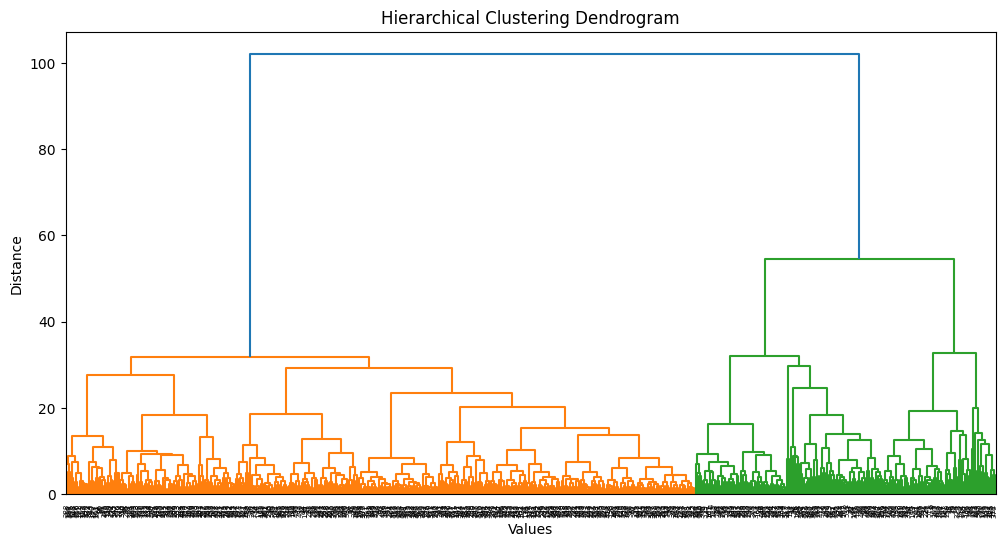

In [29]:
plt.figure(figsize=(12, 6))
dendrogram(z)
plt.xlabel('Values')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [ ]:
#K-means

In [35]:
from sklearn.cluster import KMeans

In [38]:
cluster_sizes = range(1, 569)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(std)
    sse.append(kmeans.inertia_)

In [39]:
sse

[17070.0,
 11595.992161317798,
 10065.441178732832,
 9350.94784428065,
 8561.628733336875,
 8145.180252288139,
 7755.249956807031,
 7349.951733592403,
 6893.624295555374,
 6867.623976431278,
 6607.046487928363,
 6385.515614252708,
 6222.879694945539,
 6122.605409661608,
 5863.012931545438,
 5918.788892523298,
 5633.915988527585,
 5487.518580510432,
 5412.162526454801,
 5299.105503971262,
 5283.136830609199,
 5128.42795694927,
 5079.264384649581,
 4904.680469098533,
 4935.311396265159,
 4764.33853114818,
 4666.765736932857,
 4625.5353804937795,
 4634.405149896817,
 4510.368588179574,
 4479.9372016256775,
 4386.517479180254,
 4343.624348006322,
 4285.270414369083,
 4279.784618498881,
 4205.916766527993,
 4152.680490149109,
 4009.61165096706,
 4065.5982316439145,
 3973.4796219157406,
 3936.581274612609,
 3958.643813232041,
 3896.135646119992,
 3898.0592741276287,
 3909.3558360269126,
 3799.3719223394223,
 3789.8897783302054,
 3679.5680949294338,
 3575.4684588333794,
 3547.4472557668546,
 

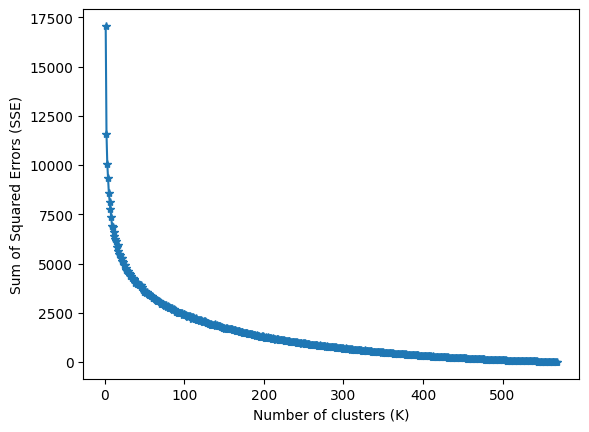

In [41]:
plt.plot(cluster_sizes, sse, marker='*')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [42]:
cluster_sizes = range(1, 10)
sse = []
for k in cluster_sizes:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(std)
    sse.append(kmeans.inertia_)

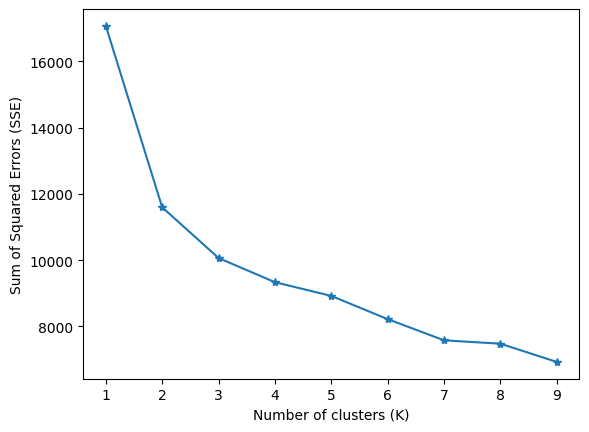

In [43]:
plt.plot(cluster_sizes, sse, marker='*')

plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [49]:
optimal_k =2
k_opt = KMeans(n_clusters=2)
k_opt.fit(std)

KMeans(n_clusters=2)

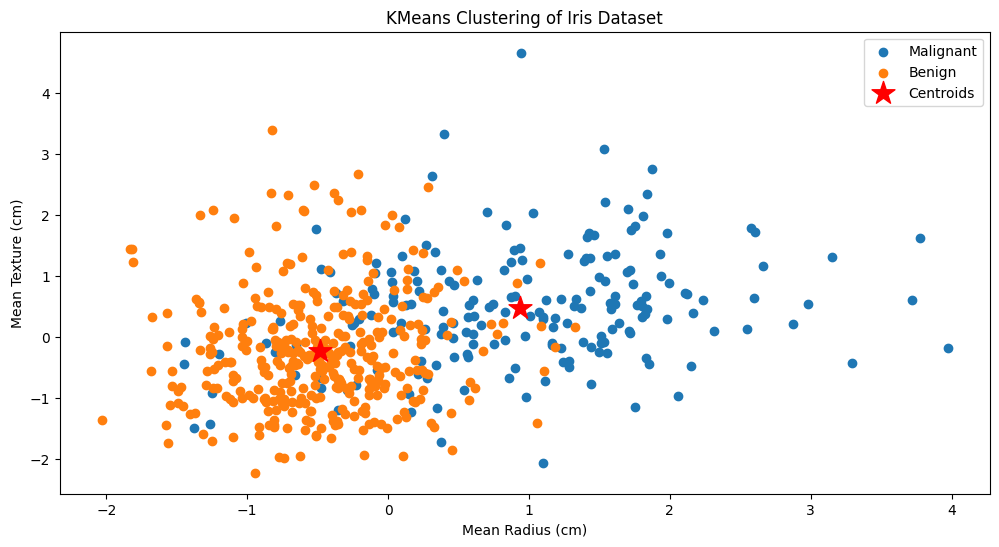

In [50]:

plt.figure(figsize=(12, 6))
cluster_names = {0: "Malignant", 1: "Benign"}

for i in range(optimal_k):
    plt.scatter(std[k_opt.labels_ == i, 0], std[k_opt.labels_ == i, 1],label=cluster_names[i])

plt.scatter(k_opt.cluster_centers_[:, 0], k_opt.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Mean Radius (cm)')
plt.ylabel('Mean Texture (cm)')
plt.legend()
plt.show()

In [ ]:
DBSCAN

In [52]:
nn = NearestNeighbors(n_neighbors=2)
nn.fit(std)
distances, _ = nn.kneighbors(std)
distances = np.sort(distances[:,1])

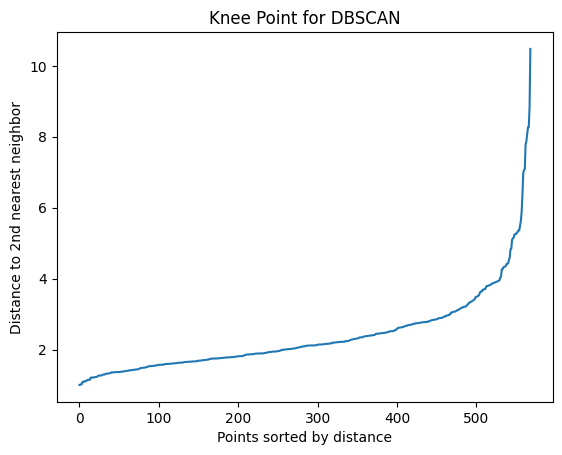

In [53]:
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 2nd nearest neighbor")
plt.title("Knee Point for DBSCAN")
plt.show()

In [54]:
eps = 0.8
min_samples = 5
metric = 'euclidean'

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="euclidean")
labels = dbscan.fit_predict(std)

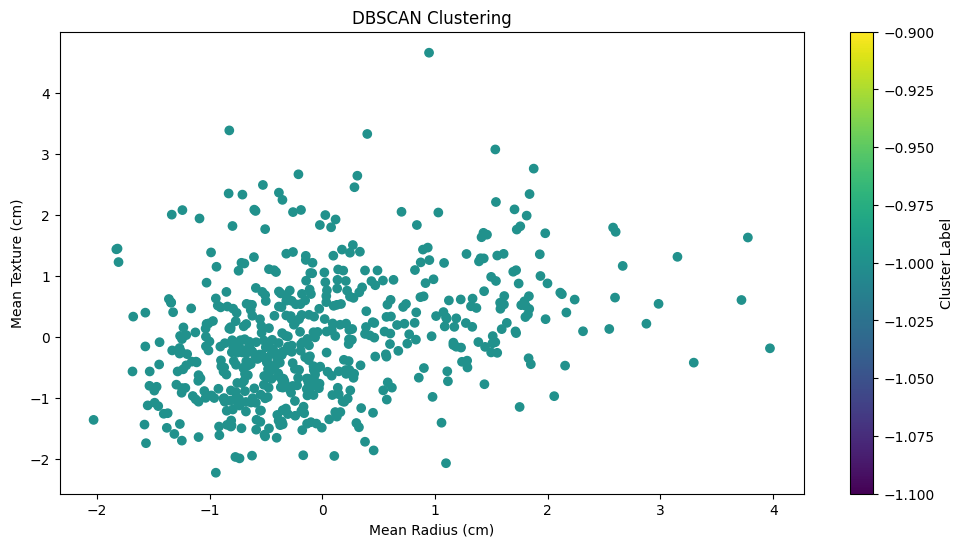

In [55]:
plt.figure(figsize=(12, 6))
cluster_names = {0: "Malignant", 1: "Benign"}
plt.scatter(std[:,0], std[:,1], c=labels,label=cluster_names[i])
plt.xlabel("Mean Radius (cm)")
plt.ylabel("Mean Texture (cm)")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()
